In [5]:
from services import ParserService, SimulationService
from schemas import AdviserConfig

from schemas import ExtractionSchema
from llama_cloud_services import LlamaExtract

In [6]:
extractor = LlamaExtract()

In [7]:
agent = extractor.create_agent('parser', ExtractionSchema)

In [8]:
data = agent.extract('financial_adviser_client_conversation.txt').data

Extracting files: 100%|██████████| 1/1 [00:04<00:00,  4.53s/it]


In [9]:
data

{'name': 'Andrea',
 'age': 42.0,
 'retirement_age': 65.0,
 'plan_end_age': 100.0,
 'current_portfolio_value': 120000.0,
 'income_source': ['Salary', 'Rental Income'],
 'income_amount': [7916.67, 1000.0],
 'income_start_age': [42, 42],
 'income_end_age': [65, 65],
 'expense_name': ['General Expenses'],
 'expense_amount': [4500.0],
 'expense_start_age': [42],
 'expense_end_age': [100]}

In [10]:
adviser_config = AdviserConfig(
    risk_allocation_map={1: 0.3, 2: 0.5, 3: 0.6, 4: 0.8, 5: 0.9},
    inflation=0.02,
    asset_costs={"stocks": 0.001, "bonds": 0.001, "cash": 0.001},
    expected_returns={"stocks": 0.08, "bonds": 0.04, "cash": 0.02},
    number_of_simulations=1000
)


In [11]:
parser = ParserService(user_id=1, filepath='financial_adviser_client_conversation.txt')
profile, cash_flows = parser.extract_data()

Extracting files: 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]

{'name': 'Andrea', 'age': 42.0, 'retirement_age': 65.0, 'plan_end_age': 100.0, 'current_portfolio_value': 120000.0, 'income_source': ['Salary', 'Rental income'], 'income_amount': [7916.666666666667, 1000.0], 'income_start_age': [42, 42], 'income_end_age': [65, 65], 'expense_name': ['Total monthly expenses'], 'expense_amount': [4500.0], 'expense_start_age': [42], 'expense_end_age': [100]}


In [4]:
simulator = SimulationService(profile, cash_flows, adviser_config)
result = simulator.simulate()

   step  cashflow
0   0.0  53000.04
1  24.0 -54000.00
      stocks  bonds  cash
step                     
0.0      0.9    0.1   0.0
16.0     0.8    0.2   0.0
19.0     0.6    0.4   0.0
21.0     0.5    0.5   0.0
23.0     0.3    0.7   0.0
Simulating...
destitution area 0.015431034482758621


c:\Users\olive\Documents\AdviceTools\AdviceTools\simulation_engine\commands.py:90: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_sim_data["transactions"] = base_sim_data["transactions"].fillna(0)


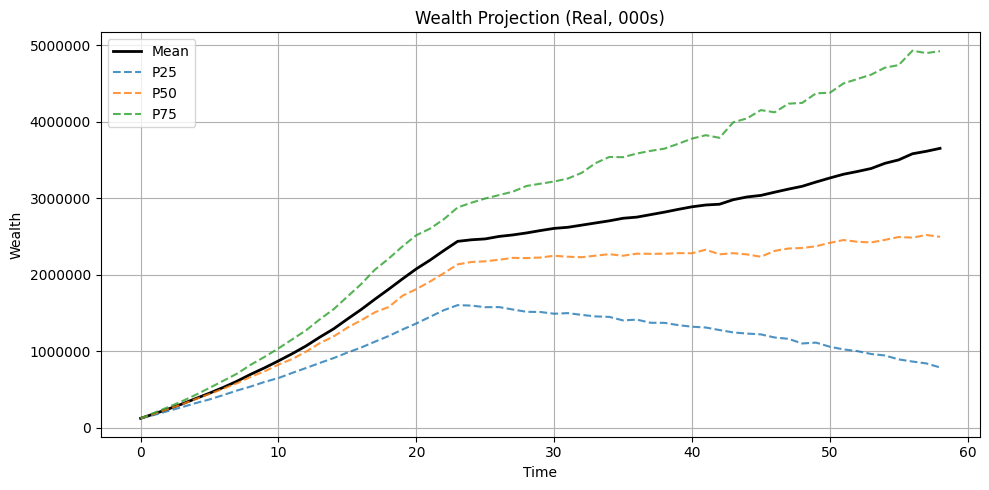

In [5]:
import matplotlib.pyplot as plt

def plot_simulation_series(result, use_real=True, percentiles=(5, 25, 50, 75, 95)):
    data = result.real if use_real else result.nominal
    x = result.timesteps
    plt.figure(figsize=(10, 5))

    plt.plot(x, data.mean, label="Mean", color="black", linewidth=2)

    for p in percentiles:
        y = data.percentiles.get(p) or data.percentiles.get(float(p))
        if y:
            plt.plot(x, y, label=f"P{int(p)}", linestyle="--", alpha=0.8)
    
    plt.ticklabel_format(axis='y', style='plain', useOffset=False)
    plt.xlabel("Time")
    plt.ylabel("Wealth")
    plt.title(f"Wealth Projection ({'Real, 000s' if use_real else 'Nominal, 000s'})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_simulation_series(result)

In [21]:
percentiles = result.real.percentiles

In [22]:
result.destitution

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.001,
 0.001,
 0.001,
 0.002,
 0.004,
 0.004,
 0.004,
 0.005,
 0.006,
 0.008,
 0.013,
 0.013,
 0.017,
 0.023,
 0.029,
 0.04,
 0.046,
 0.051,
 0.065,
 0.071,
 0.083,
 0.091,
 0.095,
 0.108,
 0.114]